In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 
import datetime 

# Data Processing

## Loading data

In [2]:
df_hospital_org = pd.read_csv('/Users/jessie/Desktop/summer_project/Definitive_Healthcare%3A_USA_Hospital_Beds.csv', usecols = ['COUNTY_NAME', 'STATE_NAME', 'NUM_LICENSED_BEDS', 'NUM_STAFFED_BEDS', 'AVG_VENTILATOR_USAGE'])
df_social_mobility_org = pd.read_csv('/Users/jessie/Desktop/summer_project/social_mobility_data(up_to_date)/County.csv', usecols = ['CTNAME', 'STFIPS', 'date', 'Social distancing index', 'New cases/1000 people', 'Population density', '% people older than 60', 'COVID death rate'])
df_COVID19_org = pd.read_csv('/Users/jessie/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
df_state_fips = pd.read_csv('/Users/jessie/Desktop/summer_project/social_mobility_data(up_to_date)/fips-states.csv', usecols = ['state_name', 'fips'])

In [3]:
print(df_hospital_org.shape)
df_hospital_org.head()

(6622, 5)


,COUNTY_NAME,STATE_NAME,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,AVG_VENTILATOR_USAGE
0,Maricopa,Arizona,62.0,62.0,0.0
1,Pima,Arizona,295.0,295.0,2.0
2,Fresno,California,54.0,54.0,2.0
3,New Haven,Connecticut,216.0,216.0,2.0
4,New Castle,Delaware,62.0,62.0,1.0


In [4]:
print(df_social_mobility_org.shape)
df_social_mobility_org.head()

(559276, 8)


,CTNAME,STFIPS,Social distancing index,date,% people older than 60,Population density,COVID death rate,New cases/1000 people
0,Autauga County,1,54,01/01/2020,19,91,0.0,0.0
1,Autauga County,1,25,01/02/2020,19,91,0.0,0.0
2,Autauga County,1,15,01/03/2020,19,91,0.0,0.0
3,Autauga County,1,33,01/04/2020,19,91,0.0,0.0
4,Autauga County,1,40,01/05/2020,19,91,0.0,0.0


In [5]:
print(df_COVID19_org.shape)
df_COVID19_org.head()

(3261, 177)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,247,247,247,253,257,267,280,280,280,280
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,30,30,30,30,30,30,31,31,31,31
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,6922,7066,7189,7250,7465,7537,7608,7683,7787,7916
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,81,81,81,81,81,90,92,98,111,111


In [6]:
print(df_state_fips.shape)
df_state_fips.head()

(51, 2)


,state_name,fips
0,Alabama,1
1,Alaska,2
2,Arizona,4
3,Arkansas,5
4,California,6


## Preprocess Hospital resources data

In [7]:
print(df_hospital_org.isnull().sum())
df_hospital = df_hospital_org.dropna()

COUNTY_NAME              28
STATE_NAME               28
NUM_LICENSED_BEDS       150
NUM_STAFFED_BEDS        238
AVG_VENTILATOR_USAGE     71
dtype: int64


In [8]:
print(df_hospital.dtypes)
print(df_hospital.describe())

df_hospital['COUNTY'] = df_hospital['COUNTY_NAME'] + str(',') + df_hospital["STATE_NAME"]
df_hospital_group = df_hospital.groupby(by = 'COUNTY').agg('sum').reset_index()

df_hospital_group.drop(df_hospital_group.loc[(df_hospital_group['NUM_STAFFED_BEDS']/ df_hospital_group['NUM_LICENSED_BEDS'] <= 0.1) 
                                             & (df_hospital_group['NUM_STAFFED_BEDS'] <= 10)].index, inplace = True)
print(len(df_hospital_group))
df_hospital_group.head()

COUNTY_NAME              object
STATE_NAME               object
NUM_LICENSED_BEDS       float64
NUM_STAFFED_BEDS        float64
AVG_VENTILATOR_USAGE    float64
dtype: object
       NUM_LICENSED_BEDS  NUM_STAFFED_BEDS  AVG_VENTILATOR_USAGE
count        6356.000000       6356.000000           6356.000000
mean          150.487256        128.924638              3.650409
std           183.131072        160.582287              5.517830
min             1.000000          1.000000              0.000000
25%            26.000000         25.000000              0.000000
50%            79.000000         66.000000              2.000000
75%           200.000000        168.000000              4.000000
max          2059.000000       2753.000000             61.000000
2491


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,COUNTY,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,AVG_VENTILATOR_USAGE
0,"Abbeville,South Carolina",25.0,25.0,2.0
1,"Acadia,Louisiana",170.0,144.0,3.0
2,"Accomack,Virginia",52.0,46.0,3.0
3,"Ada,Idaho",1311.0,1240.0,24.0
4,"Adair,Iowa",25.0,25.0,0.0


## Preprocess social mobility data

In [373]:
print(df_social_mobility_org.isnull().sum())
df_social_mobility = df_social_mobility_org.dropna()

CTNAME                     0
STFIPS                     0
Social distancing index    0
date                       0
% people older than 60     0
Population density         0
COVID death rate           0
New cases/1000 people      0
dtype: int64


In [374]:
df_social_mobility['CTNAME'] = df_social_mobility['CTNAME'].apply(lambda x: x.replace(str(' County'), ''))
df_social_mobility_merge = pd.merge(df_social_mobility, df_state_fips, left_on = 'STFIPS', right_on = 'fips')
df_social_mobility_merge['COUNTY'] = df_social_mobility_merge['CTNAME'] + str(',') + df_social_mobility_merge['state_name']
df_social_mobility_merge.drop(columns = ['CTNAME', 'STFIPS', 'state_name', 'fips'], inplace = True)
df_social_mobility_merge.head()
#df_social_mobility_group = df_social_mobility_merge.groupby(by = 'date')

#print(df_social_mobility_group.size())
#df_social_mobility_current = df_social_mobility_group.get_group('06/22/2020')

# print(df_social_mobility_current.dtypes)
# print(df_social_mobility_current.describe())
# df_social_mobility_current.head()
#df_social_mobility_current['Population density'].plot.hist()

#df_social_mobility_current.loc[df_social_mobility_current['Population density'] == 0]
#len(df_social_mobility_group.get_group('01/01/2020')['COUNTY'].unique())

,Social distancing index,date,% people older than 60,Population density,COVID death rate,New cases/1000 people,COUNTY
0,54,01/01/2020,19,91,0.0,0.0,"Autauga,Alabama"
1,25,01/02/2020,19,91,0.0,0.0,"Autauga,Alabama"
2,15,01/03/2020,19,91,0.0,0.0,"Autauga,Alabama"
3,33,01/04/2020,19,91,0.0,0.0,"Autauga,Alabama"
4,40,01/05/2020,19,91,0.0,0.0,"Autauga,Alabama"


## Preprocess COVID19 data

In [13]:
print(df_COVID19_org.isnull().sum())
df_COVID19 = df_COVID19_org.dropna()
print(df_COVID19.shape)

UID                0
iso2               0
iso3               0
code3              0
FIPS              10
Admin2             7
Province_State     0
Country_Region     0
Lat                0
Long_              0
Combined_Key       0
1/22/20            0
1/23/20            0
1/24/20            0
1/25/20            0
1/26/20            0
1/27/20            0
1/28/20            0
1/29/20            0
1/30/20            0
1/31/20            0
2/1/20             0
2/2/20             0
2/3/20             0
2/4/20             0
2/5/20             0
2/6/20             0
2/7/20             0
2/8/20             0
2/9/20             0
                  ..
6/6/20             0
6/7/20             0
6/8/20             0
6/9/20             0
6/10/20            0
6/11/20            0
6/12/20            0
6/13/20            0
6/14/20            0
6/15/20            0
6/16/20            0
6/17/20            0
6/18/20            0
6/19/20            0
6/20/20            0
6/21/20            0
6/22/20      

In [14]:
df_COVID19.columns.to_series()

UID                          UID
iso2                        iso2
iso3                        iso3
code3                      code3
FIPS                        FIPS
Admin2                    Admin2
Province_State    Province_State
Country_Region    Country_Region
Lat                          Lat
Long_                      Long_
Combined_Key        Combined_Key
1/22/20                  1/22/20
1/23/20                  1/23/20
1/24/20                  1/24/20
1/25/20                  1/25/20
1/26/20                  1/26/20
1/27/20                  1/27/20
1/28/20                  1/28/20
1/29/20                  1/29/20
1/30/20                  1/30/20
1/31/20                  1/31/20
2/1/20                    2/1/20
2/2/20                    2/2/20
2/3/20                    2/3/20
2/4/20                    2/4/20
2/5/20                    2/5/20
2/6/20                    2/6/20
2/7/20                    2/7/20
2/8/20                    2/8/20
2/9/20                    2/9/20
          

In [16]:
df_COVID19_demo = df_COVID19[['Admin2', 'Province_State', 'Lat', 'Long_']]
df_COVID19_demo['COUNTY'] = df_COVID19_demo['Admin2'] + str(',') + df_COVID19_demo['Province_State']
df_COVID19_demo.drop(columns = ['Admin2', 'Province_State'], inplace = True)
df_COVID19_demo.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Lat,Long_,COUNTY
5,32.539527,-86.644082,"Autauga,Alabama"
6,30.727750,-87.722071,"Baldwin,Alabama"
7,31.868263,-85.387129,"Barbour,Alabama"
8,32.996421,-87.125115,"Bibb,Alabama"
9,33.982109,-86.567906,"Blount,Alabama"


In [18]:
start = df_COVID19.columns.get_loc('3/1/20')
end = df_COVID19.columns.get_loc('6/26/20')

df_COVID19_daily = df_COVID19.iloc[:, start: end + 1]
df_COVID19_daily.head()

,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20
5,0,0,0,0,0,0,0,0,0,0,...,369,394,405,425,428,436,447,463,473,482
6,0,0,0,0,0,0,0,0,0,0,...,377,386,398,405,415,422,435,449,462,500
7,0,0,0,0,0,0,0,0,0,0,...,250,262,265,271,271,276,279,287,303,309
8,0,0,0,0,0,0,0,0,0,0,...,115,118,123,123,124,126,132,138,146,150
9,0,0,0,0,0,0,0,0,0,0,...,121,127,136,140,146,150,156,165,173,181


In [19]:
df_COVID19 = pd.concat([df_COVID19_demo, df_COVID19_daily], axis = 1)
df_COVID19.head()

,Lat,Long_,COUNTY,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20
5,32.539527,-86.644082,"Autauga,Alabama",0,0,0,0,0,0,0,...,369,394,405,425,428,436,447,463,473,482
6,30.727750,-87.722071,"Baldwin,Alabama",0,0,0,0,0,0,0,...,377,386,398,405,415,422,435,449,462,500
7,31.868263,-85.387129,"Barbour,Alabama",0,0,0,0,0,0,0,...,250,262,265,271,271,276,279,287,303,309
8,32.996421,-87.125115,"Bibb,Alabama",0,0,0,0,0,0,0,...,115,118,123,123,124,126,132,138,146,150
9,33.982109,-86.567906,"Blount,Alabama",0,0,0,0,0,0,0,...,121,127,136,140,146,150,156,165,173,181


## Get 5 nearby county

In [438]:
df_COVID19.head()

,Lat,Long_,COUNTY,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20
5,32.539527,-86.644082,"Autauga,Alabama",0,0,0,0,0,0,0,...,369,394,405,425,428,436,447,463,473,482
6,30.727750,-87.722071,"Baldwin,Alabama",0,0,0,0,0,0,0,...,377,386,398,405,415,422,435,449,462,500
7,31.868263,-85.387129,"Barbour,Alabama",0,0,0,0,0,0,0,...,250,262,265,271,271,276,279,287,303,309
8,32.996421,-87.125115,"Bibb,Alabama",0,0,0,0,0,0,0,...,115,118,123,123,124,126,132,138,146,150
9,33.982109,-86.567906,"Blount,Alabama",0,0,0,0,0,0,0,...,121,127,136,140,146,150,156,165,173,181


In [439]:
df_county = df_COVID19[['COUNTY', 'Lat', 'Long_']]

In [440]:
def get_NearbyCounty(df, row):
    df['Distance'] = np.sqrt((df['Lat'] - row['Lat'])**2 + (df['Long_'] - row['Long_'])**2)
    df.sort_values(by = ['Distance'], inplace = True)
    county_array = np.array(df['COUNTY'].iloc[1:6].get_values())
    return [county_array]

In [441]:
#df_sub = df_county.iloc[0:5]
#df_sub.loc[df_sub['COUNTY'] == 'Baldwin,Alabama']
df_county['NEARBY_COUNTY'] = df_county.apply(lambda x: get_NearbyCounty(df_county.copy(), x), axis = 1)
df_county.head()
#df_sub.apply(lambda x: return(x['COUNTY']), axis = 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,COUNTY,Lat,Long_,NEARBY_COUNTY
5,"Autauga,Alabama",32.539527,-86.644082,"[[Chilton,Alabama, Lowndes,Alabama, Elmore,Ala..."
6,"Baldwin,Alabama",30.727750,-87.722071,"[[Escambia,Florida, Mobile,Alabama, Escambia,A..."
7,"Barbour,Alabama",31.868263,-85.387129,"[[Quitman,Georgia, Henry,Alabama, Bullock,Alab..."
8,"Bibb,Alabama",32.996421,-87.125115,"[[Perry,Alabama, Chilton,Alabama, Tuscaloosa,A..."
9,"Blount,Alabama",33.982109,-86.567906,"[[Cullman,Alabama, St. Clair,Alabama, Marshall..."


In [442]:
df_county.shape

(3244, 4)

In [443]:
df_county.drop(columns = ['Lat', 'Long_'], inplace = True)
df_county.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,COUNTY,NEARBY_COUNTY
5,"Autauga,Alabama","[[Chilton,Alabama, Lowndes,Alabama, Elmore,Ala..."
6,"Baldwin,Alabama","[[Escambia,Florida, Mobile,Alabama, Escambia,A..."
7,"Barbour,Alabama","[[Quitman,Georgia, Henry,Alabama, Bullock,Alab..."
8,"Bibb,Alabama","[[Perry,Alabama, Chilton,Alabama, Tuscaloosa,A..."
9,"Blount,Alabama","[[Cullman,Alabama, St. Clair,Alabama, Marshall..."


In [444]:
dict_NearbyCounty = df_county.set_index('COUNTY')['NEARBY_COUNTY'].to_dict()
len(dict_NearbyCounty['Autauga,Alabama'][0])

5

In [446]:
#df_sub.iloc[0]['COUNTY'] in df_sub["NEARBY_COUNTY"].iloc[3][0]

## Altering structure for COVID19 dataset

In [341]:
date_array = np.array(df_COVID19_daily.columns)

In [342]:
datetime_array = [datetime.datetime.strptime(date + '20',"%m/%d/%Y") for date in date_array]

In [346]:
datetime_list = [datetime.strftime("%m/%d/%Y") for datetime in datetime_array]

In [274]:
df_COVID19_tempo = df_COVID19.drop(columns = ['Lat', 'Long_'])
df_COVID19_tempo.set_index('COUNTY', inplace = True)

In [275]:
df_COVID19_tempo.head()

,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20
COUNTY,,,,,,,,,,,,,,,,,,,,,
"Autauga,Alabama",0,0,0,0,0,0,0,0,0,0,...,369,394,405,425,428,436,447,463,473,482
"Baldwin,Alabama",0,0,0,0,0,0,0,0,0,0,...,377,386,398,405,415,422,435,449,462,500
"Barbour,Alabama",0,0,0,0,0,0,0,0,0,0,...,250,262,265,271,271,276,279,287,303,309
"Bibb,Alabama",0,0,0,0,0,0,0,0,0,0,...,115,118,123,123,124,126,132,138,146,150
"Blount,Alabama",0,0,0,0,0,0,0,0,0,0,...,121,127,136,140,146,150,156,165,173,181


In [334]:
stack_array = df_COVID19_tempo.stack().values.tolist()
len(stack_array)

382792

In [293]:
county_array = np.array([])

In [294]:
#county_array = np.append(county_array, [np.repeat(county, len(date_array)) for county in df_COVID19_tempo.index])

In [329]:
county_array = np.repeat(df_COVID19_tempo.index, len(date_array)).tolist()

In [330]:
len(county_array)

382792

In [350]:
#cum_date_array = date_array.tolist()
cum_date_array = datetime_list * len(df_COVID19_tempo.index)

In [351]:
len(cum_date_array)

382792

In [362]:
len(stack_array)

382792

In [353]:
df_COVID19_final = pd.DataFrame({'COUNTY': county_array, 'DATE': cum_date_array, 'DAILY_INCREASE': stack_array})

In [357]:
df_COVID19_final['COUNTY_AND_DATE'] = df_COVID19_final['COUNTY'] + str(',') + df_COVID19_final['DATE']

In [358]:
df_COVID19_final[(df_COVID19_final['COUNTY'] == 'Autauga,Alabama') & (df_COVID19_final['DATE'] == '06/17/2020')]

,COUNTY,DATE,DAILY_INCREASE,COUNTY_AND_DATE
108,"Autauga,Alabama",06/17/2020,369,"Autauga,Alabama,06/17/2020"


In [392]:
df_COVID19_final.head()

,COUNTY,DATE,DAILY_INCREASE,COUNTY_AND_DATE
0,"Autauga,Alabama",03/01/2020,0,"Autauga,Alabama,03/01/2020"
1,"Autauga,Alabama",03/02/2020,0,"Autauga,Alabama,03/02/2020"
2,"Autauga,Alabama",03/03/2020,0,"Autauga,Alabama,03/03/2020"
3,"Autauga,Alabama",03/04/2020,0,"Autauga,Alabama,03/04/2020"
4,"Autauga,Alabama",03/05/2020,0,"Autauga,Alabama,03/05/2020"


## Minor change in Social Mobility Dataset

In [375]:
df_social_mobility_merge.head()

,Social distancing index,date,% people older than 60,Population density,COVID death rate,New cases/1000 people,COUNTY
0,54,01/01/2020,19,91,0.0,0.0,"Autauga,Alabama"
1,25,01/02/2020,19,91,0.0,0.0,"Autauga,Alabama"
2,15,01/03/2020,19,91,0.0,0.0,"Autauga,Alabama"
3,33,01/04/2020,19,91,0.0,0.0,"Autauga,Alabama"
4,40,01/05/2020,19,91,0.0,0.0,"Autauga,Alabama"


In [376]:
df_social_mobility_merge[(df_social_mobility_merge['COUNTY'] == 'Autauga,Alabama') & (df_social_mobility_merge['date'] == '06/17/2020')]

,Social distancing index,date,% people older than 60,Population density,COVID death rate,New cases/1000 people,COUNTY
11058,22,06/17/2020,19,91,1.25,0.0719,"Autauga,Alabama"


In [377]:
len(df_social_mobility_merge)

559276

In [378]:
df_social_mobility_merge['date'] = [datetime.datetime.strptime(date,"%m/%d/%Y") for date in df_social_mobility_merge['date']]

In [379]:
start_date = datetime.datetime(2020, 3, 1)
end_date = datetime.datetime(2020, 6, 26)

In [387]:
df_social_mobility_part = df_social_mobility_merge[(df_social_mobility_merge['date'] >= start_date) 
                                                   & (df_social_mobility_merge['date'] <= end_date)]

In [393]:
df_social_mobility_part.head()

,Social distancing index,date,% people older than 60,Population density,COVID death rate,New cases/1000 people,COUNTY,COUNTY_AND_DATE
60,35,03/01/2020,19,91,0.0,0.0,"Autauga,Alabama","Autauga,Alabama,03/01/2020"
61,11,03/02/2020,19,91,0.0,0.0,"Autauga,Alabama","Autauga,Alabama,03/02/2020"
62,10,03/03/2020,19,91,0.0,0.0,"Autauga,Alabama","Autauga,Alabama,03/03/2020"
63,19,03/04/2020,19,91,0.0,0.0,"Autauga,Alabama","Autauga,Alabama,03/04/2020"
64,12,03/05/2020,19,91,0.0,0.0,"Autauga,Alabama","Autauga,Alabama,03/05/2020"


In [389]:
df_social_mobility_part['date'] = [datetime.strftime("%m/%d/%Y") for datetime in df_social_mobility_part['date']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [390]:
df_social_mobility_part.head()

,Social distancing index,date,% people older than 60,Population density,COVID death rate,New cases/1000 people,COUNTY
60,35,03/01/2020,19,91,0.0,0.0,"Autauga,Alabama"
61,11,03/02/2020,19,91,0.0,0.0,"Autauga,Alabama"
62,10,03/03/2020,19,91,0.0,0.0,"Autauga,Alabama"
63,19,03/04/2020,19,91,0.0,0.0,"Autauga,Alabama"
64,12,03/05/2020,19,91,0.0,0.0,"Autauga,Alabama"


In [394]:
df_social_mobility_part['COUNTY_AND_DATE'] = df_social_mobility_part['COUNTY'] + str(',') + df_social_mobility_part['date']
df_social_mobility_part.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Social distancing index,date,% people older than 60,Population density,COVID death rate,New cases/1000 people,COUNTY,COUNTY_AND_DATE
60,35,03/01/2020,19,91,0.0,0.0,"Autauga,Alabama","Autauga,Alabama,03/01/2020"
61,11,03/02/2020,19,91,0.0,0.0,"Autauga,Alabama","Autauga,Alabama,03/02/2020"
62,10,03/03/2020,19,91,0.0,0.0,"Autauga,Alabama","Autauga,Alabama,03/03/2020"
63,19,03/04/2020,19,91,0.0,0.0,"Autauga,Alabama","Autauga,Alabama,03/04/2020"
64,12,03/05/2020,19,91,0.0,0.0,"Autauga,Alabama","Autauga,Alabama,03/05/2020"


In [468]:
df_social_mobility_part.shape

(370756, 8)

## Combining social mobility datasets and COVID19 dataset

In [407]:
df_mobility_COVID19 = pd.merge(df_COVID19_final, df_social_mobility_part, on = ['COUNTY_AND_DATE'])

In [411]:
df_mobility_COVID19_new = df_mobility_COVID19.drop(columns = ['date', 'COUNTY_y'])

In [412]:
df_mobility_COVID19_new.head()

,COUNTY_x,DATE,DAILY_INCREASE,COUNTY_AND_DATE,Social distancing index,% people older than 60,Population density,COVID death rate,New cases/1000 people
0,"Autauga,Alabama",03/01/2020,0,"Autauga,Alabama,03/01/2020",35,19,91,0.0,0.0
1,"Autauga,Alabama",03/02/2020,0,"Autauga,Alabama,03/02/2020",11,19,91,0.0,0.0
2,"Autauga,Alabama",03/03/2020,0,"Autauga,Alabama,03/03/2020",10,19,91,0.0,0.0
3,"Autauga,Alabama",03/04/2020,0,"Autauga,Alabama,03/04/2020",19,19,91,0.0,0.0
4,"Autauga,Alabama",03/05/2020,0,"Autauga,Alabama,03/05/2020",12,19,91,0.0,0.0


In [413]:
df_mobility_COVID19_new = df_mobility_COVID19_new.rename(columns = {'COUNTY_x': 'COUNTY', 
                                                                    'DAILY_INCREASE': 'Daily increase'})

In [418]:
#df_mobility_COVID19_new[df_mobility_COVID19_new.isnull().any(axis=1)]

,COUNTY,DATE,Daily increase,COUNTY_AND_DATE,Social distancing index,% people older than 60,Population density,COVID death rate,New cases/1000 people


In [419]:
df_mobility_COVID19_new = df_mobility_COVID19_new[['COUNTY_AND_DATE', 'COUNTY', 'DATE', 'Daily increase', 'Social distancing index', 
                                                   'New cases/1000 people', 'COVID death rate', '% people older than 60', 'Population density']]

In [420]:
df_mobility_COVID19_new.head()

,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,Social distancing index,New cases/1000 people,COVID death rate,% people older than 60,Population density
0,"Autauga,Alabama,03/01/2020","Autauga,Alabama",03/01/2020,0,35,0.0,0.0,19,91
1,"Autauga,Alabama,03/02/2020","Autauga,Alabama",03/02/2020,0,11,0.0,0.0,19,91
2,"Autauga,Alabama,03/03/2020","Autauga,Alabama",03/03/2020,0,10,0.0,0.0,19,91
3,"Autauga,Alabama,03/04/2020","Autauga,Alabama",03/04/2020,0,19,0.0,0.0,19,91
4,"Autauga,Alabama,03/05/2020","Autauga,Alabama",03/05/2020,0,12,0.0,0.0,19,91


## Generating daily increase, social distancing index and death rate for each county during the past 1-10 days

In [571]:
df_MACA = df_mobility_COVID19_new[df_mobility_COVID19_new['COUNTY'].str.contains('Massachusetts|California')]
df_MACA.head()

,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,Social distancing index,New cases/1000 people,COVID death rate,% people older than 60,Population density
18526,"Alameda,California,03/01/2020","Alameda,California",03/01/2020,0,37,0.0000,0.00,19,2002
18527,"Alameda,California,03/02/2020","Alameda,California",03/02/2020,0,17,0.0000,0.00,19,2002
18528,"Alameda,California,03/03/2020","Alameda,California",03/03/2020,1,16,0.0002,0.00,19,2002
18529,"Alameda,California,03/04/2020","Alameda,California",03/04/2020,1,14,0.0002,0.03,19,2002
18530,"Alameda,California,03/05/2020","Alameda,California",03/05/2020,1,15,0.0002,0.03,19,2002


In [572]:
df_sub = df_MACA.iloc[:20]
df_sub

,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,Social distancing index,New cases/1000 people,COVID death rate,% people older than 60,Population density
18526,"Alameda,California,03/01/2020","Alameda,California",03/01/2020,0,37,0.0000,0.00,19,2002
18527,"Alameda,California,03/02/2020","Alameda,California",03/02/2020,0,17,0.0000,0.00,19,2002
18528,"Alameda,California,03/03/2020","Alameda,California",03/03/2020,1,16,0.0002,0.00,19,2002
18529,"Alameda,California,03/04/2020","Alameda,California",03/04/2020,1,14,0.0002,0.03,19,2002
18530,"Alameda,California,03/05/2020","Alameda,California",03/05/2020,1,15,0.0002,0.03,19,2002
18531,"Alameda,California,03/06/2020","Alameda,California",03/06/2020,1,14,0.0000,0.03,19,2002
18532,"Alameda,California,03/07/2020","Alameda,California",03/07/2020,2,32,0.0002,0.03,19,2002
18533,"Alameda,California,03/08/2020","Alameda,California",03/08/2020,2,41,0.0002,0.03,19,2002
18534,"Alameda,California,03/09/2020","Alameda,California",03/09/2020,2,21,0.0002,0.02,19,2002
18535,"Alameda,California,03/10/2020","Alameda,California",03/10/2020,3,19,0.0002,0.04,19,2002


In [559]:
def get_previous(df, col_name, new_col_name, period):
    counties = df['COUNTY'].unique()
    data = np.array([])
    for county in counties:
        county_data = df[col_name][df['COUNTY'] == county]
        county_new_data = county_data[: -period]
        fill_in = np.array([None] * period)
        county_final_data = np.append(fill_in, county_new_data)
        data = np.append(data, county_final_data)
    df[new_col_name] = data
    return df

In [573]:
period_date = 10
for period in range(1, period_date + 1):
    new_col_name = 'Daily increase_' + str(period) + 'd'
    df_MACA = get_previous(df_MACA.copy(), 'Daily increase', new_col_name, period)

df_MACA.iloc[:20]

,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,Social distancing index,New cases/1000 people,COVID death rate,% people older than 60,Population density,Daily increase_1d,Daily increase_2d,Daily increase_3d,Daily increase_4d,Daily increase_5d,Daily increase_6d,Daily increase_7d,Daily increase_8d,Daily increase_9d,Daily increase_10d
18526,"Alameda,California,03/01/2020","Alameda,California",03/01/2020,0,37,0.0000,0.00,19,2002,None,None,None,None,None,None,None,None,None,None
18527,"Alameda,California,03/02/2020","Alameda,California",03/02/2020,0,17,0.0000,0.00,19,2002,0,None,None,None,None,None,None,None,None,None
18528,"Alameda,California,03/03/2020","Alameda,California",03/03/2020,1,16,0.0002,0.00,19,2002,0,0,None,None,None,None,None,None,None,None
18529,"Alameda,California,03/04/2020","Alameda,California",03/04/2020,1,14,0.0002,0.03,19,2002,1,0,0,None,None,None,None,None,None,None
18530,"Alameda,California,03/05/2020","Alameda,California",03/05/2020,1,15,0.0002,0.03,19,2002,1,1,0,0,None,None,None,None,None,None
18531,"Alameda,California,03/06/2020","Alameda,California",03/06/2020,1,14,0.0000,0.03,19,2002,1,1,1,0,0,None,None,None,None,None
18532,"Alameda,California,03/07/2020","Alameda,California",03/07/2020,2,32,0.0002,0.03,19,2002,1,1,1,1,0,0,None,None,None,None
18533,"Alameda,California,03/08/2020","Alameda,California",03/08/2020,2,41,0.0002,0.03,19,2002,2,1,1,1,1,0,0,None,None,None
18534,"Alameda,California,03/09/2020","Alameda,California",03/09/2020,2,21,0.0002,0.02,19,2002,2,2,1,1,1,1,0,0,None,None
18535,"Alameda,California,03/10/2020","Alameda,California",03/10/2020,3,19,0.0002,0.04,19,2002,2,2,2,1,1,1,1,0,0,None


In [574]:
period_date = 10
for period in range(1, period_date + 1):
    new_col_name = 'Social distancing index_' + str(period) + 'd'
    df_MACA = get_previous(df_MACA.copy(), 'Social distancing index', new_col_name, period)

df_MACA.iloc[:20]

,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,Social distancing index,New cases/1000 people,COVID death rate,% people older than 60,Population density,Daily increase_1d,...,Social distancing index_1d,Social distancing index_2d,Social distancing index_3d,Social distancing index_4d,Social distancing index_5d,Social distancing index_6d,Social distancing index_7d,Social distancing index_8d,Social distancing index_9d,Social distancing index_10d
18526,"Alameda,California,03/01/2020","Alameda,California",03/01/2020,0,37,0.0000,0.00,19,2002,None,...,None,None,None,None,None,None,None,None,None,None
18527,"Alameda,California,03/02/2020","Alameda,California",03/02/2020,0,17,0.0000,0.00,19,2002,0,...,37,None,None,None,None,None,None,None,None,None
18528,"Alameda,California,03/03/2020","Alameda,California",03/03/2020,1,16,0.0002,0.00,19,2002,0,...,17,37,None,None,None,None,None,None,None,None
18529,"Alameda,California,03/04/2020","Alameda,California",03/04/2020,1,14,0.0002,0.03,19,2002,1,...,16,17,37,None,None,None,None,None,None,None
18530,"Alameda,California,03/05/2020","Alameda,California",03/05/2020,1,15,0.0002,0.03,19,2002,1,...,14,16,17,37,None,None,None,None,None,None
18531,"Alameda,California,03/06/2020","Alameda,California",03/06/2020,1,14,0.0000,0.03,19,2002,1,...,15,14,16,17,37,None,None,None,None,None
18532,"Alameda,California,03/07/2020","Alameda,California",03/07/2020,2,32,0.0002,0.03,19,2002,1,...,14,15,14,16,17,37,None,None,None,None
18533,"Alameda,California,03/08/2020","Alameda,California",03/08/2020,2,41,0.0002,0.03,19,2002,2,...,32,14,15,14,16,17,37,None,None,None
18534,"Alameda,California,03/09/2020","Alameda,California",03/09/2020,2,21,0.0002,0.02,19,2002,2,...,41,32,14,15,14,16,17,37,None,None
18535,"Alameda,California,03/10/2020","Alameda,California",03/10/2020,3,19,0.0002,0.04,19,2002,2,...,21,41,32,14,15,14,16,17,37,None


In [635]:
all(df_MACA.groupby('COUNTY')['% people older than 60'].value_counts() == 118)

True

In [636]:
all(df_MACA.groupby('COUNTY')['Population density'].value_counts() == 118)

True

In [637]:
new_col_name = 'New case/100 people_1d'
df_MACA = get_previous(df_MACA.copy(), 'New cases/1000 people', new_col_name, 1)

In [638]:
df_MACA.head()

,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,Social distancing index,New cases/1000 people,COVID death rate,% people older than 60,Population density,Daily increase_1d,...,Social distancing index_2d,Social distancing index_3d,Social distancing index_4d,Social distancing index_5d,Social distancing index_6d,Social distancing index_7d,Social distancing index_8d,Social distancing index_9d,Social distancing index_10d,New case/100 people_1d
18526,"Alameda,California,03/01/2020","Alameda,California",03/01/2020,0,37,0.0000,0.00,19,2002,None,...,None,None,None,None,None,None,None,None,None,None
18527,"Alameda,California,03/02/2020","Alameda,California",03/02/2020,0,17,0.0000,0.00,19,2002,0,...,None,None,None,None,None,None,None,None,None,0
18528,"Alameda,California,03/03/2020","Alameda,California",03/03/2020,1,16,0.0002,0.00,19,2002,0,...,37,None,None,None,None,None,None,None,None,0
18529,"Alameda,California,03/04/2020","Alameda,California",03/04/2020,1,14,0.0002,0.03,19,2002,1,...,17,37,None,None,None,None,None,None,None,0.0002
18530,"Alameda,California,03/05/2020","Alameda,California",03/05/2020,1,15,0.0002,0.03,19,2002,1,...,16,17,37,None,None,None,None,None,None,0.0002


In [639]:
new_col_name = 'COVID death rate_1d'
df_MACA = get_previous(df_MACA.copy(), 'COVID death rate', new_col_name, 1)
df_MACA.head()

,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,Social distancing index,New cases/1000 people,COVID death rate,% people older than 60,Population density,Daily increase_1d,...,Social distancing index_3d,Social distancing index_4d,Social distancing index_5d,Social distancing index_6d,Social distancing index_7d,Social distancing index_8d,Social distancing index_9d,Social distancing index_10d,New case/100 people_1d,COVID death rate_1d
18526,"Alameda,California,03/01/2020","Alameda,California",03/01/2020,0,37,0.0000,0.00,19,2002,None,...,None,None,None,None,None,None,None,None,None,None
18527,"Alameda,California,03/02/2020","Alameda,California",03/02/2020,0,17,0.0000,0.00,19,2002,0,...,None,None,None,None,None,None,None,None,0,0
18528,"Alameda,California,03/03/2020","Alameda,California",03/03/2020,1,16,0.0002,0.00,19,2002,0,...,None,None,None,None,None,None,None,None,0,0
18529,"Alameda,California,03/04/2020","Alameda,California",03/04/2020,1,14,0.0002,0.03,19,2002,1,...,37,None,None,None,None,None,None,None,0.0002,0
18530,"Alameda,California,03/05/2020","Alameda,California",03/05/2020,1,15,0.0002,0.03,19,2002,1,...,17,37,None,None,None,None,None,None,0.0002,0.03


In [640]:
df_MACA_include_previous = df_MACA.dropna()
df_MACA_include_previous.head()

,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,Social distancing index,New cases/1000 people,COVID death rate,% people older than 60,Population density,Daily increase_1d,...,Social distancing index_3d,Social distancing index_4d,Social distancing index_5d,Social distancing index_6d,Social distancing index_7d,Social distancing index_8d,Social distancing index_9d,Social distancing index_10d,New case/100 people_1d,COVID death rate_1d
18536,"Alameda,California,03/11/2020","Alameda,California",03/11/2020,5,18,0.0006,0.06,19,2002,3,...,41,32,14,15,14,16,17,37,0.0002,0.04
18537,"Alameda,California,03/12/2020","Alameda,California",03/12/2020,5,20,0.0006,0.07,19,2002,5,...,21,41,32,14,15,14,16,17,0.0006,0.06
18538,"Alameda,California,03/13/2020","Alameda,California",03/13/2020,7,19,0.0008,0.06,19,2002,5,...,19,21,41,32,14,15,14,16,0.0006,0.07
18539,"Alameda,California,03/14/2020","Alameda,California",03/14/2020,11,48,0.0012,0.07,19,2002,7,...,18,19,21,41,32,14,15,14,0.0008,0.06
18540,"Alameda,California,03/15/2020","Alameda,California",03/15/2020,11,59,0.0012,0.08,19,2002,11,...,20,18,19,21,41,32,14,15,0.0012,0.07


In [647]:
df_MACA_dropped = df_MACA_include_previous.drop(columns = ['Social distancing index', 'New cases/1000 people', 'COVID death rate'])
df_MACA_dropped.head()

,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,% people older than 60,Population density,Daily increase_1d,Daily increase_2d,Daily increase_3d,Daily increase_4d,...,Social distancing index_3d,Social distancing index_4d,Social distancing index_5d,Social distancing index_6d,Social distancing index_7d,Social distancing index_8d,Social distancing index_9d,Social distancing index_10d,New case/100 people_1d,COVID death rate_1d
18536,"Alameda,California,03/11/2020","Alameda,California",03/11/2020,5,19,2002,3,2,2,2,...,41,32,14,15,14,16,17,37,0.0002,0.04
18537,"Alameda,California,03/12/2020","Alameda,California",03/12/2020,5,19,2002,5,3,2,2,...,21,41,32,14,15,14,16,17,0.0006,0.06
18538,"Alameda,California,03/13/2020","Alameda,California",03/13/2020,7,19,2002,5,5,3,2,...,19,21,41,32,14,15,14,16,0.0006,0.07
18539,"Alameda,California,03/14/2020","Alameda,California",03/14/2020,11,19,2002,7,5,5,3,...,18,19,21,41,32,14,15,14,0.0008,0.06
18540,"Alameda,California,03/15/2020","Alameda,California",03/15/2020,11,19,2002,11,7,5,5,...,20,18,19,21,41,32,14,15,0.0012,0.07


In [554]:
# i = np.array([])
# l = df_sub['Daily increase'][df_sub['COUNTY'] == 'Alameda,California']
# print(type(l.values))
# np.append(l.values, i)

<class 'numpy.ndarray'>


array([ 0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  5.,  5.,  7.,
       11., 11., 18., 27., 30., 38., 48.])

In [558]:
# n = np.array([None] * 3)
# np.append(n, l.values)

array([None, None, None, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 5, 5, 7, 11, 11,
       18, 27, 30, 38, 48], dtype=object)

In [557]:
# l.values[:-3]

array([ 0,  0,  1,  1,  1,  1,  2,  2,  2,  3,  5,  5,  7, 11, 11, 18, 27])

## Generating nearby 5 counties' average social distancing index and average daily increase in positive tests

In [642]:
# df_sub = df_mobility_COVID19_new[df_mobility_COVID19_new['DATE'] == '06/15/2020']
# df_sub

In [643]:
def get_NearbyAverage(df, cur_index, column_name, dictionary = dict_NearbyCounty):
    if cur_index % 500 == 0:
        print('This is row: ', cur_index)
        
    cur_county = df['COUNTY'][df.index == cur_index].values[0]
    cur_date = df['DATE'][df.index == cur_index].values[0]
    nearby_county = dict_NearbyCounty[cur_county][0]
    
    df_subset = df[df['DATE'] == cur_date]
    county_array = df_subset['COUNTY'].unique()
    dict_data = df_subset.set_index('COUNTY')[column_name].to_dict()
    
    avg = 0
    num_county = 0
    for county in nearby_county:
        if county not in county_array:
            break
        #print(df[column_name][(df['COUNTY'] == county) & (df['DATE'] == cur_date)].values[0])
        #avg += df_subset[column_name][df_subset['COUNTY'] == county].values[0]
        avg += dict_data[county]
        num_county += 1
        #print(avg)

    if num_county == 0:
        #print('No nearby county found! County: ' + cur_county)
        return None
    
    avg = avg/num_county
    return avg

In [648]:
df_MACA_reset_index = df_MACA_dropped.reset_index()
nearby_avg_dailyinc = [get_NearbyAverage(df_MACA_reset_index, index, 'Daily increase_1d') 
              for index in df_MACA_reset_index.index]
df_MACA_dropped['nearby_avg_dailyinc_1d'] = nearby_avg_dailyinc
df_MACA_dropped.head()

This is row:  0
This is row:  500
This is row:  1000
This is row:  1500
This is row:  2000
This is row:  2500
This is row:  3000
This is row:  3500
This is row:  4000
This is row:  4500
This is row:  5000
This is row:  5500
This is row:  6000
This is row:  6500
This is row:  7000
This is row:  7500


,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,% people older than 60,Population density,Daily increase_1d,Daily increase_2d,Daily increase_3d,Daily increase_4d,...,Social distancing index_4d,Social distancing index_5d,Social distancing index_6d,Social distancing index_7d,Social distancing index_8d,Social distancing index_9d,Social distancing index_10d,New case/100 people_1d,COVID death rate_1d,nearby_avg_dailyinc_1d
18536,"Alameda,California,03/11/2020","Alameda,California",03/11/2020,5,19,2002,3,2,2,2,...,32,14,15,14,16,17,37,0.0002,0.04,15.2
18537,"Alameda,California,03/12/2020","Alameda,California",03/12/2020,5,19,2002,5,3,2,2,...,41,32,14,15,14,16,17,0.0006,0.06,17.8
18538,"Alameda,California,03/13/2020","Alameda,California",03/13/2020,7,19,2002,5,5,3,2,...,21,41,32,14,15,14,16,0.0006,0.07,22.2
18539,"Alameda,California,03/14/2020","Alameda,California",03/14/2020,11,19,2002,7,5,5,3,...,19,21,41,32,14,15,14,0.0008,0.06,30.8
18540,"Alameda,California,03/15/2020","Alameda,California",03/15/2020,11,19,2002,11,7,5,5,...,18,19,21,41,32,14,15,0.0012,0.07,38.2


In [649]:
df_MACA_reset_index = df_MACA_dropped.reset_index()
nearby_avg_socialidx = [get_NearbyAverage(df_MACA_reset_index, index, 'Social distancing index_1d') 
              for index in df_MACA_reset_index.index]
df_MACA_dropped['nearby_avg_socialidx'] = nearby_avg_socialidx
df_MACA_dropped.head()

This is row:  0
This is row:  500
This is row:  1000
This is row:  1500
This is row:  2000
This is row:  2500
This is row:  3000
This is row:  3500
This is row:  4000
This is row:  4500
This is row:  5000
This is row:  5500
This is row:  6000
This is row:  6500
This is row:  7000
This is row:  7500


,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,% people older than 60,Population density,Daily increase_1d,Daily increase_2d,Daily increase_3d,Daily increase_4d,...,Social distancing index_5d,Social distancing index_6d,Social distancing index_7d,Social distancing index_8d,Social distancing index_9d,Social distancing index_10d,New case/100 people_1d,COVID death rate_1d,nearby_avg_dailyinc_1d,nearby_avg_socialidx
18536,"Alameda,California,03/11/2020","Alameda,California",03/11/2020,5,19,2002,3,2,2,2,...,14,15,14,16,17,37,0.0002,0.04,15.2,21.0
18537,"Alameda,California,03/12/2020","Alameda,California",03/12/2020,5,19,2002,5,3,2,2,...,32,14,15,14,16,17,0.0006,0.06,17.8,22.0
18538,"Alameda,California,03/13/2020","Alameda,California",03/13/2020,7,19,2002,5,5,3,2,...,41,32,14,15,14,16,0.0006,0.07,22.2,22.6
18539,"Alameda,California,03/14/2020","Alameda,California",03/14/2020,11,19,2002,7,5,5,3,...,21,41,32,14,15,14,0.0008,0.06,30.8,21.0
18540,"Alameda,California,03/15/2020","Alameda,California",03/15/2020,11,19,2002,11,7,5,5,...,19,21,41,32,14,15,0.0012,0.07,38.2,46.4


In [650]:
df_MACA_final = df_MACA_dropped.dropna()
print(df_MACA_final.shape)
df_MACA_final.head()

(6804, 30)


,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,% people older than 60,Population density,Daily increase_1d,Daily increase_2d,Daily increase_3d,Daily increase_4d,...,Social distancing index_5d,Social distancing index_6d,Social distancing index_7d,Social distancing index_8d,Social distancing index_9d,Social distancing index_10d,New case/100 people_1d,COVID death rate_1d,nearby_avg_dailyinc_1d,nearby_avg_socialidx
18536,"Alameda,California,03/11/2020","Alameda,California",03/11/2020,5,19,2002,3,2,2,2,...,14,15,14,16,17,37,0.0002,0.04,15.2,21.0
18537,"Alameda,California,03/12/2020","Alameda,California",03/12/2020,5,19,2002,5,3,2,2,...,32,14,15,14,16,17,0.0006,0.06,17.8,22.0
18538,"Alameda,California,03/13/2020","Alameda,California",03/13/2020,7,19,2002,5,5,3,2,...,41,32,14,15,14,16,0.0006,0.07,22.2,22.6
18539,"Alameda,California,03/14/2020","Alameda,California",03/14/2020,11,19,2002,7,5,5,3,...,21,41,32,14,15,14,0.0008,0.06,30.8,21.0
18540,"Alameda,California,03/15/2020","Alameda,California",03/15/2020,11,19,2002,11,7,5,5,...,19,21,41,32,14,15,0.0012,0.07,38.2,46.4


## Conbining the social mobility data, the COVID 19 dataset and the hospital dataset

In [651]:
df_basic = pd.merge(df_MACA_final, df_hospital_group, on = ['COUNTY'])
df_basic

,COUNTY_AND_DATE,COUNTY,DATE,Daily increase,% people older than 60,Population density,Daily increase_1d,Daily increase_2d,Daily increase_3d,Daily increase_4d,...,Social distancing index_8d,Social distancing index_9d,Social distancing index_10d,New case/100 people_1d,COVID death rate_1d,nearby_avg_dailyinc_1d,nearby_avg_socialidx,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,AVG_VENTILATOR_USAGE
0,"Alameda,California,03/11/2020","Alameda,California",03/11/2020,5,19,2002,3,2,2,2,...,16,17,37,0.0002,0.04,15.2,21.0,3464.0,3570.0,74.0
1,"Alameda,California,03/12/2020","Alameda,California",03/12/2020,5,19,2002,5,3,2,2,...,14,16,17,0.0006,0.06,17.8,22.0,3464.0,3570.0,74.0
2,"Alameda,California,03/13/2020","Alameda,California",03/13/2020,7,19,2002,5,5,3,2,...,15,14,16,0.0006,0.07,22.2,22.6,3464.0,3570.0,74.0
3,"Alameda,California,03/14/2020","Alameda,California",03/14/2020,11,19,2002,7,5,5,3,...,14,15,14,0.0008,0.06,30.8,21.0,3464.0,3570.0,74.0
4,"Alameda,California,03/15/2020","Alameda,California",03/15/2020,11,19,2002,11,7,5,5,...,32,14,15,0.0012,0.07,38.2,46.4,3464.0,3570.0,74.0
5,"Alameda,California,03/16/2020","Alameda,California",03/16/2020,18,19,2002,11,11,7,5,...,41,32,14,0.0012,0.08,37.4,56.8,3464.0,3570.0,74.0
6,"Alameda,California,03/17/2020","Alameda,California",03/17/2020,27,19,2002,18,11,11,7,...,21,41,32,0.0022,0.08,52.4,35.6,3464.0,3570.0,74.0
7,"Alameda,California,03/18/2020","Alameda,California",03/18/2020,30,19,2002,27,18,11,11,...,19,21,41,0.0032,0.13,62.8,60.0,3464.0,3570.0,74.0
8,"Alameda,California,03/19/2020","Alameda,California",03/19/2020,38,19,2002,30,27,18,11,...,18,19,21,0.0038,0.15,71.6,59.6,3464.0,3570.0,74.0
9,"Alameda,California,03/20/2020","Alameda,California",03/20/2020,48,19,2002,38,30,27,18,...,20,18,19,0.004,0.23,80.6,57.0,3464.0,3570.0,74.0


In [652]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [653]:
X = df_basic.iloc[:, 4:]
y = df_basic.iloc[:, 3]

In [654]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [655]:
reg = LinearRegression()
cv_result = cross_validate(reg, X_train, y_train, cv = 5, return_estimator = True)

In [656]:
cv_result['test_score']

array([0.9999076 , 0.999935  , 0.99986935, 0.99988717, 0.99987904])

In [657]:
reg_after_cv = cv_result['estimator'][3]

In [663]:
y_predict = reg_after_cv.predict(X_test)

In [660]:
reg_after_cv.score(X_test, y_test)

0.9998692341870147

In [661]:
from sklearn.metrics import mean_squared_error

In [664]:
mean_squared_error(y_test, y_predict)

3764.3241018382887

In [673]:
ratio = []
for i in range(len(y_test)):
    if y_test.iloc[i] != 0:
        ratio.append((y_predict[i] - y_test.iloc[i])/(y_test.iloc[i]))

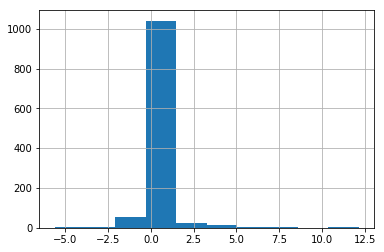

In [675]:
pd.Series(ratio).hist()

# Scratch

In [463]:
key = df_sub['COUNTY'][df_sub.index == 120].values[0]
print(key)
date = df_sub['DATE'][df_sub.index == 120].values[0]
print(date)
dict_NearbyCounty[key][0]

Baldwin,Alabama
03/03/2020


array(['Escambia,Florida', 'Mobile,Alabama', 'Escambia,Alabama',
       'Santa Rosa,Florida', 'Washington,Alabama'], dtype=object)

In [471]:
df_sub.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=1000)

In [ ]:
print(len(df_hospital_group))
print(len(df_social_mobility_current))
print(len(df_COVID19))

In [ ]:
df_basic = pd.merge(df_COVID19, pd.merge(df_hospital_group, df_social_mobility_current, on = ['COUNTY']), on = ['COUNTY'])
#print(len(df_basic))
print(df_basic.iloc[0])
df_clean = df_basic.drop(columns = ['Admin2', 'Province_State', 'CTNAME', 'STFIPS', 'date', 'state_name', 'fips'])
state_col = df_clean.pop('COUNTY')
df_clean.insert(0, 'COUNTY', state_col)
df_clean.to_csv('./social_mobility_and _covid19.csv')
print(df_clean.shape)
df_clean.head()

In [ ]:
county_list = df_hospital["COUNTY_NAME"].unique()
np.any([type(i) == float for i in county_list])
check = [type(i) == float for i in county_list]
for i in range(len(check)):
    if check[i] == True:
        print(i)
        print(county_list[i])
print(county_list[1410:1420])
#len(county_list)

In [ ]:
df_social_mobility = pd.read_csv('/Users/jessie/Desktop/summer_project/social_mobility_data(up_to_date)/County.csv')

In [ ]:
df_social_mobility.head()

In [ ]:
df_social_mobility.iloc[0]

In [ ]:
df_social_mobility.isnull().sum()

In [ ]:
len(df_social_mobility['CTNAME'].unique())
type(df_social_mobility['CTNAME'].unique())
print(df_social_mobility['CTNAME'].unique())

In [ ]:
np.intersect1d(df_hospital['COUNTY_NAME'].unique(), df_social_mobility['CTNAME'].unique())

In [ ]:
pwd

In [ ]:
cd Desktop/summer_project/

In [ ]:
cd '/Users/jessie/Documents/GitHub/'

In [ ]:
ls

In [ ]:
cd COVID-19

In [ ]:
ls

In [ ]:
cd csse_covid_19_data/

In [ ]:
ls

In [ ]:
cd  csse_covid_19_time_series

In [ ]:
ls